<a href="https://colab.research.google.com/github/Ram-Mohan333/Colab/blob/main/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import losses
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Activation, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings

In [2]:
train_path = '/content/drive/MyDrive/datasets/dogvscats/train'
test_path = '/content/drive/MyDrive/datasets/dogvscats/test'
valid_path = '/content/drive/MyDrive/datasets/dogvscats/valid'

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input) .flow_from_directory(directory=train_path, target_size=(299,299), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input) .flow_from_directory(directory=valid_path, target_size=(299,299), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input) .flow_from_directory(directory=test_path, target_size=(299,299), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [4]:
new_model = applications.inception_v3.InceptionV3()

In [5]:
new_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [12]:
x = new_model.layers[-2].output
output = Dense(units = 2, activation='softmax')(x)

In [13]:
model = Model(inputs=new_model.input, outputs = output)

In [14]:
for layer in model.layers[:-23]:
  layer.trainable = False

In [15]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [16]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(x = train_batches, validation_data = valid_batches, epochs=5, verbose=1)

Epoch 1/5
100/100 [==============================] - 275s 3s/step - loss: 0.0972 - accuracy: 0.9660 - val_loss: 0.0349 - val_accuracy: 0.9950
Epoch 2/5
100/100 [==============================] - 285s 3s/step - loss: 0.0492 - accuracy: 0.9860 - val_loss: 0.0452 - val_accuracy: 0.9900
Epoch 3/5
100/100 [==============================] - 284s 3s/step - loss: 0.0332 - accuracy: 0.9900 - val_loss: 0.0276 - val_accuracy: 0.9950
Epoch 4/5
100/100 [==============================] - 279s 3s/step - loss: 0.0243 - accuracy: 0.9940 - val_loss: 0.0384 - val_accuracy: 0.9950
Epoch 5/5
100/100 [==============================] - 283s 3s/step - loss: 0.0215 - accuracy: 0.9950 - val_loss: 0.0373 - val_accuracy: 0.9950


In [18]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
test_labels = test_batches.classes
predictions = model.predict(x = test_batches, verbose = 0)


Confusion matrix, without normalization
[[49  1]
 [ 0 50]]


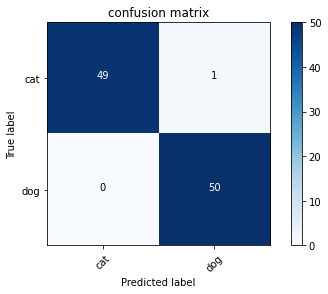

In [21]:
cm = confusion_matrix(y_true = test_labels, y_pred = predictions.argmax(axis = 1))
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm = cm, classes = cm_plot_labels, title = 'confusion matrix')